<a href="https://colab.research.google.com/github/arun248751/Life-Insurance-Case-Study/blob/main/colab_notebooks/Getting_Started_with_Colab_and_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of content

* [R Notebooks in Google Colab](#rnote-colab)
  * [Enable editing by making a copy](#make-copy)
  * [Code cells and execution](#code-cell)
  * [Text cells](#text-cell)
  * [Addin and moving cells](#adding-cells)
* [Setup R environment](#setup-r)
* [OUTRIDER example](#outrider-example)
* [Exercise](#Exercise)

# R Notebooks in Google Colab <a name="rnote-colab"></a>

We will use IR notebooks throughout this workshop to run code and visualize results. IR notebooks are similar to IPython notebooks. It combines documentation with code in a single document. If you know already how to use notebooks please skip to the [OUTRIDER example](#outrider-example). Since we will extensively use R/Bioconductor packages it is helpful but not needed to have some basic knowledge of programming in R. To get started with programming in R have a look [here](https://moderndive.netlify.com/1-getting-started.html) or [here](https://rladiessydney.org/courses/ryouwithme/basicbasics).

A notebook is a list of cells. Cells contain either explanatory text (text cells) or executable code (code cells) and its output. Double click a cell to select/edit it.

The notebook and code is run on a virtual maschine hosted by Google.

For more details on how to use Google Colab and IPython notebooks please refer to the [Colab docs](https://colab.research.google.com/notebooks/welcome.ipynb) and the [IPyhton notebook docs](https://jupyter.org/).

## Enable editing by making a copy <a name="make-copy"></a>

To enable **editing** of the notebook please make a copy of it and place it into your google drive. Please click on: `"File" -> "Save a copy in Drive"`. Allow access to your google drive if requested.

## Code cells <a name="code-cell"></a>

Below is a **code cell**. Once the toolbar button indicates CONNECTED on the right top, click in the cell to select it and execute the contents in the following ways:

* Click the **Play icon** in the left gutter of the cell;
* Type **Cmd/Ctrl+Enter** to run the cell in place;
* Type **Shift+Enter** to run the cell and move focus to the next cell (adding one if none exists); or
* Type **Alt+Enter** to run the cell and insert a new code cell immediately below it.

There are additional options for running some or all cells in the **Runtime menu**.

In [ ]:
12
a = 10 + 5
a

[1] 12

[1] 15

## Text cells <a name="text-cell"></a>
This is a **text cell**. You can **double-click** to edit this cell. Text cells
use markdown syntax. To learn more, see the [markdown
guide](/notebooks/markdown_guide.ipynb).

You can also add math to text cells using [LaTeX](http://www.latex-project.org/)
to be rendered by [MathJax](https://www.mathjax.org). Just place the statement
within a pair of **\$** signs. For example `$\sqrt{3x-1}+(1+x)^2$` becomes
$\sqrt{3x-1}+(1+x)^2.$

## Adding and moving cells <a name="adding-cells"></a>

You can add new cells by using the **+ CODE** and **+ TEXT** buttons that show when you hover between cells. These buttons are also in the toolbar above the notebook where they can be used to add a cell below the currently selected cell.

You can move a cell by selecting it and clicking **Cell Up** or **Cell Down** in the top toolbar.

## Navigation bar

If you click on the left top corner on the arrow a navigation bar will open. The navigation bar contains the table of content and links the sections. Additionally under the `Files` tab one can browse all files in the virtual machine as well as up- and download files. Mounting of the google drive is only available in a python notebook right now.

# Setup R environment <a name="setup-r"></a>

Since installing and compiling all necessary R packages can take a while, we precompiled them. By downloading our [`r-env-setup-script.R`](https://github.com/c-mertes/RNAseq-ASHG19/blob/master/r-env-setup-script.R) and running it, you setup and configure the virtual maschine for the workshop.

Please run this command **before any analysis** and **each time you start a new session**!

In [12]:
download.file("https://raw.githubusercontent.com/c-mertes/RNAseq-ASHG19/master/r-env-setup-script.R", "r-env-setup-script.R")
source("r-env-setup-script.R")

Update and install needed Ubuntu packages

Download R package cache

Unzipping R package cache

Warning message in system("tar -xzf r_binaries.tar.gz -C / ", intern = TRUE):
“running command 'tar -xzf r_binaries.tar.gz -C / ' had status 2”
Retrieve data for tutorials



# OUTRIDER example <a name="outrider-example"></a>

This is the quick guide from the vignette of [`OUTRTIDER`](http://bioconductor.org/packages/release/bioc/html/OUTRIDER.html). For the full guide of `OUTRIDER` please have a look at the [vignette](http://bioconductor.org/packages/release/bioc/vignettes/OUTRIDER/inst/doc/OUTRIDER.pdf).

First we have to install `OUTRIDER` if not done already.

In [13]:
if(!requireNamespace("BiocManager", quietly=TRUE))
    install.packages("BiocManager")
if(!requireNamespace("OUTRIDER", quietly=TRUE))
    BiocManager::install("OUTRIDER", Ncpus=10)

Now we can run the example from the OUTRIDER vignette

In [14]:
# load package
library(OUTRIDER)

In [15]:
# load raw count and sample data
ctsFile <- system.file('extdata', 'KremerNBaderSmall.tsv', package='OUTRIDER')
ctsTable <- read.table(ctsFile, check.names=FALSE)
ods <- OutriderDataSet(countData=ctsTable)

The `ods` object contains now all information (eg. raw counts, sample names, and gene names) needed for the analysis.

In [16]:
ods

class: OutriderDataSet
class: RangedSummarizedExperiment 
dim: 999 119 
metadata(1): version
assays(1): counts
rownames(999): DDX11L1 OR4F5 ... GORAB PRRX1
rowData names(0):
colnames(119): 65937 66623 ... MUC1412 MUC1436
colData names(1): sampleID

Before we start the analysis, we should cleanup the data first.

In [17]:
# filter out non expressed genes
ods <- filterExpression(ods, minCounts=TRUE, filterGenes=TRUE)

229 genes did not pass the filter due to zero counts. This is 22.9% of the genes.



Now we can fit our autoencoder model and compute p-values

In [18]:
# run full OUTRIDER pipeline (control, fit model, calculate P-values)
register(MulticoreParam(2))
ods <- OUTRIDER(ods, iterations=4)

Thu Nov 13 02:35:28 2025: SizeFactor estimation ...

Thu Nov 13 02:35:28 2025: Controlling for confounders ...



Optimal encoding dimension: 16 


Using estimated q with: 16

Thu Nov 13 02:35:28 2025: Using the autoencoder implementation for controlling.



[1] "Thu Nov 13 02:35:31 2025: Initial PCA loss: 4.76571576945417"
[1] "Thu Nov 13 02:35:38 2025: Iteration: 1 loss: 4.29964282970878"
[1] "Thu Nov 13 02:35:43 2025: Iteration: 2 loss: 4.28429149543074"
[1] "Thu Nov 13 02:35:46 2025: Iteration: 3 loss: 4.27315692689935"
[1] "Thu Nov 13 02:35:49 2025: Iteration: 4 loss: 4.26774431325123"
Time difference of 15.20253 secs
[1] "Thu Nov 13 02:35:49 2025: 4 Final nb-AE loss: 4.26774431325123"


Thu Nov 13 02:35:49 2025: Used the autoencoder implementation for controlling.

Thu Nov 13 02:35:49 2025: P-value calculation ...

Thu Nov 13 02:35:50 2025: Zscore calculation ...



Lets have now a look at the results. They can be retrived by running `results()`.

In [19]:
# results (only significant)
res <- results(ods)
head(res)

geneID,sampleID,pValue,padjust,zScore,l2fc,rawcounts,meanRawcounts,normcounts,meanCorrected,theta,aberrant,AberrantBySample,AberrantByGene,padj_rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>
ATAD3C,MUC1360,5.120063e-13,2.848125e-09,5.73,2.22,948,82.29,317.74,67.97,12.48,TRUE,1,1,1
MSTO1,MUC1367,1.653766e-09,9.199368e-06,-6.40,-0.88,761,1327.87,692.85,1276.61,133.66,TRUE,1,1,1
NBPF15,MUC1351,7.416240e-09,4.125415e-05,5.39,0.77,7591,4224.88,7033.63,4123.90,98.14,TRUE,2,1,1
RPS27,MUC1372,2.281542e-08,1.269148e-04,-6.07,-0.92,949,10951.09,5557.14,10508.44,102.23,TRUE,1,1,1
DCAF6,MUC1374,9.535485e-08,5.304282e-04,-5.66,-0.67,2348,4869.53,2976.71,4726.56,164.21,TRUE,1,1,1
NBPF16,MUC1351,5.683760e-07,1.580846e-03,4.67,0.68,4014,2459.90,3861.08,2403.69,96.46,TRUE,2,1,2


We can also look into more details on a specific gene or sample

In [20]:
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading required package: ggplot2



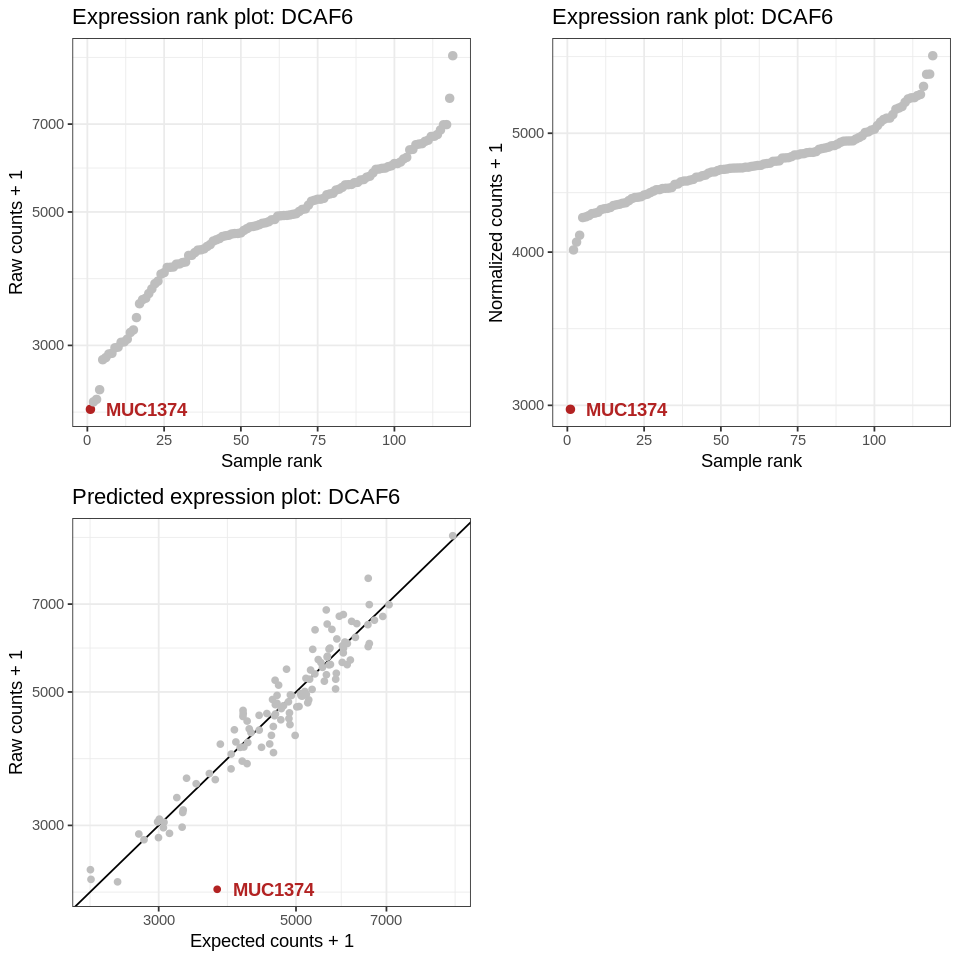

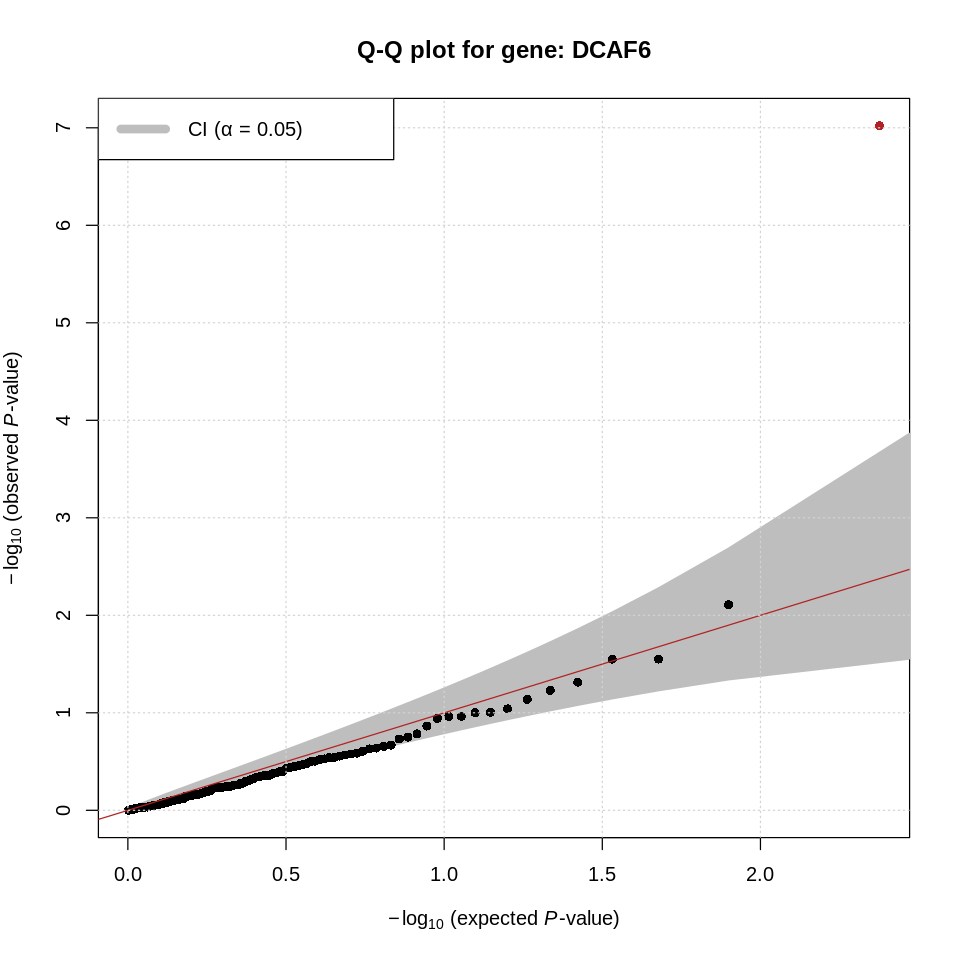

In [21]:
# Options to define plots size
options(repr.plot.width=8, repr.plot.height=8)

# example gene expression plot across samples
library(ggpubr)
ggarrange(
    plotExpressionRank(ods, res[5, geneID], normalize=FALSE, base=TRUE),
    plotExpressionRank(ods, res[5, geneID], normalize=TRUE, base=TRUE),
    plotExpectedVsObservedCounts(ods, res[5, geneID], base=TRUE))

# a quantile-quantile plot to check if the modeling worked
plotQQ(ods, res[5, geneID])

# Exercise <a name="Exercise"></a>

If you want to check if you got the IPython notebook idea and a bit of R programming, you can start now your own analysis by editing this notebook.

We give you 3 tasks you should be able to manage:

1. Add a new code cell and plot a volcano plot (function: `plotVolcano`) for sample `MUC1350` with parameter `base=TRUE`
1. Write a comment (text cell) that you will now display the gene names found significant in the analysis
1. Print the gene names (column: `geneID`) from the results table (object: `res`) and furthermore print the number of genes in total in `res` (function: `nrow`)


In [ ]:
# Options to define plots size
options(repr.plot.width=4, repr.plot.height=4)

# have fun coding here


---
title: "Group Life Case Study – Data Handling, Simulation & Modeling"
author: "Arunabha Gupta"
date: "`r format(Sys.time(), '%d %b %Y')`"
output:
  pdf_document:
    toc: true
    number_sections: true
fontsize: 11pt
geometry: margin=1in
---

# Life Insurance Case Study Start

In [127]:
install.packages("glmnet")
install.packages("xgboost")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("glmnet"):
“installation of package ‘glmnet’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("xgboost"):
“installation of package ‘xgboost’ had non-zero exit status”


In [26]:
install.packages("janitor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’




In [29]:
install.packages("tidymodels")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘warp’, ‘lhs’, ‘DiceDesign’, ‘sfd’, ‘sparsevctrs’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tailor’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’




In [128]:


set.seed(1234)
options(dplyr.summarise.inform = FALSE)

library(tidyverse)
library(janitor)
library(glue)
library(scales)
library(stringr)
library(lubridate)

library(tidymodels)
tidymodels_prefer()



In [ ]:
That R output is **standard informational output** you see when you load the **`tidymodels`** package (and its related ecosystem) in R.
Let’s break it down clearly 👇

---

### 🔹 1. The “Attaching packages” section

```
── Attaching packages ────────────────────────────── tidymodels 1.4.1 ──
✔ broom        1.0.10     ✔ rsample      1.3.1
✔ dials        1.4.2      ✔ tailor       0.1.0
✔ infer        1.0.9      ✔ tune         2.0.1
✔ modeldata    1.5.1      ✔ workflows    1.3.0
✔ parsnip      1.3.3      ✔ workflowsets 1.1.1
✔ recipes      1.3.1      ✔ yardstick    1.3.2
```

This means `tidymodels` (version 1.4.1) was loaded successfully and it automatically **attached a group of related packages** that are part of its modeling ecosystem, such as:

* `broom` → turns models into tidy data frames
* `recipes` → for preprocessing
* `parsnip` → model interface
* `rsample` → resampling and train/test splits
* `tune` → hyperparameter tuning
* `yardstick` → model evaluation metrics
* etc.

✅ So this part is **normal and expected** — it just tells you what’s now loaded and ready to use.

---

### 🔹 2. The “Conflicts” section

```
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ yardstick::accuracy()        masks generics::accuracy()
✖ infer::calculate()           masks generics::calculate()
...
✖ dplyr::filter()              masks stats::filter()
✖ dplyr::lag()                 masks stats::lag()
...
```

This section warns you about **function name conflicts** between packages — meaning two or more packages define functions with the same name.

For example:

* `dplyr::filter()` **masks** `stats::filter()`
  → When you type `filter()`, R will use `dplyr`’s version, *not* `stats`’.
* `yardstick::accuracy()` masks `generics::accuracy()`
  → The version from `yardstick` takes precedence.

This is **not an error** — just R letting you know which function will be used by default when you call that name.

If you want to call the masked one explicitly, you can do:

```r
stats::filter()     # call the original from 'stats'
dplyr::filter()     # call the one from 'dplyr'
```

---

### 🔹 3. Why this happens

R attaches packages in order, and when two packages define the same function name, the one loaded last **masks** the earlier one.
`tidymodels` is a meta-package — it loads many others, so name overlaps are common.

---

### 🔹 4. TL;DR Summary

| Section              | Meaning                                  | Action                                                                 |
| -------------------- | ---------------------------------------- | ---------------------------------------------------------------------- |
| `Attaching packages` | Lists all tidymodels sub-packages loaded | ✅ Nothing to worry about                                               |
| `Conflicts`          | Function name overlaps between packages  | ⚠️ Be aware which version runs; use `pkg::function()` syntax if needed |

---

Would you like me to show you a **clean way to suppress or manage these conflict messages** (e.g., using `conflicted` or quiet loading)?


In [129]:
# ---- Parameters you can justify/adjust during the discussion ----
valuation_date <- as.Date("2012-01-01")  # chosen for reproducibility; change if a specific date is provided

# ---- File paths (same folder as this Rmd) ----
portfolio_path <- "p01-02_portfolio.csv"
rates_path     <- "p01-02_rates.csv"

# Semicolon-delimited inputs; clean column names; keep original names for audit
portfolio_raw <- read_delim(portfolio_path, delim = ";", show_col_types = FALSE) %>% clean_names()
rates_raw     <- read_delim(rates_path,     delim = ";", show_col_types = FALSE) %>% clean_names()

glimpse(portfolio_raw)
glimpse(rates_raw)

Rows: 177,922
Columns: 5
$ scheme_name   <chr> "Scheme2", "Scheme2", "Scheme2", "Scheme2", "Scheme2", "…
$ date_of_birth <chr> "29.05.1949", "07.09.1950", "27.09.1956", "18.02.1942", …
$ gender        <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", "…
$ death_si      <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ industry      <chr> "Government & Public Administration", "Government & Publ…
Rows: 106
Columns: 3
$ age    <dbl> 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,…
$ gender <chr> "M", "M", "M", "M", "M", "M", "M", "M", "M", "M", "M", "M", "M"…
$ rate   <dbl> 0.32, 0.32, 0.32, 0.31, 0.31, 0.31, 0.30, 0.30, 0.30, 0.29, 0.2…


In [130]:
unique(portfolio_raw$industry)

[1] "Government & Public Administration" NA                                  
 [3] "LAW-Solicitors/Barrister"           "AGR-Farming/Agriculture"           
 [5] "EDN-Education"                      "VEH-Vehicle Industry"              
 [7] "FOO-Food"                           "ACR-Accom. Cafes & Rests"          
 [9] "HEA-Health Industry"                "MGE-Medical Services Gen"          
[11] "BSS-Business Services"              "MAN-Manufacturing"                 
[13] "FIN-Finance & Insurance"            "CON-Construction"                  
[15] "COM-Communication Serv."            "EGW-Electric/Gas/Water"            
[17] "RTL-Retail Trade"                   "ELE-Electricians"                  
[19] "WEO-Wholesale Trades"               "ENG-Engineers"                     
[21] "Other"                              "Sporting Club"                     
[23] "Ex-Services Club"                   "Hospitality"                       
[25] "Registered Club"                    "Workers Club"                      
[27] "Surf Life Saving Club"              "Bowls Club"                        
[29] "Golf Club"                          "Associated with Club Industry"     
[31] "Leagues Club"                       "Professional Services"             
[33] "Australian Rules Football Club"

- `Date.of.Birth` is `dd.mm.yyyy` → parse via `lubridate::dmy()`.  
- Compute **age (last birthday)** at `valuation_date`.  
- **Clamp** ages to the min/max in the rate table to avoid joins failing on out‑of‑range ages (we’ll report counts).  
- Drop rows with missing essentials (`gender`, `age`, `scheme`) and **non‑positive or missing `deathsi`** for simulation; `NA`s are documented and excluded from severity stats using `na.rm=TRUE`.

In [131]:
portfolio1 <- portfolio_raw %>%
  transmute(
    scheme   = scheme_name,
    dob      = dmy(date_of_birth),
    gender   = str_to_upper(gender) %>% str_sub(1,1),
    deathsi  = suppressWarnings(as.numeric(death_si)),
    industry = industry
  ) %>%
  mutate(age_raw = floor(time_length(interval(dob, valuation_date), unit = "years")))

In [132]:
rates <- rates_raw %>%
  transmute(age = as.integer(age),
            gender = str_to_upper(gender) %>% str_sub(1,1),
            rate = as.numeric(rate))

In [133]:
min_age <- min(rates$age, na.rm=TRUE); max_age <- max(rates$age, na.rm=TRUE)

In [134]:
portfolio2 <- portfolio1 %>%
  mutate(
    age = pmin(pmax(age_raw, min_age), max_age),
    gender = fct_other(gender, keep = c("M","F")) %>% as.character()
  )

In [135]:
diag_counts <- tibble(
  total_rows           = nrow(portfolio_raw),
  missing_deathsi      = sum(is.na(portfolio1$deathsi)),
  missing_dob          = sum(is.na(portfolio1$dob)),
  truncated_to_min_age = sum(portfolio1$age_raw < min_age, na.rm=TRUE),
  truncated_to_max_age = sum(portfolio1$age_raw > max_age, na.rm=TRUE)
)
diag_counts

total_rows,missing_deathsi,missing_dob,truncated_to_min_age,truncated_to_max_age
<int>,<int>,<int>,<int>,<int>
177922,177916,0,2663,523


In [136]:
combined_data <- portfolio2 %>%
  inner_join(rates, by = c("age","gender")) %>%
  mutate(p = rate / 1000) %>%
  arrange(scheme)

In [137]:
sim_base <- combined_data %>% filter(!is.na(deathsi), deathsi > 0)
list(rows_joined = nrow(combined_data),
     rows_simulated = nrow(sim_base),
     schemes = n_distinct(sim_base$scheme))

$rows_joined
[1] 177922

$rows_simulated
[1] 6

$schemes
[1] 4

In [138]:
make_industry_group <- function(x) {
  case_when(
    str_detect(x, regex("construct|build|civil|engineering", ignore_case=TRUE)) ~ "Construction/Engineering",
    str_detect(x, regex("manufactur|factory|plant|industrial", ignore_case=TRUE)) ~ "Manufacturing",
    str_detect(x, regex("health|hospital|medical|pharma", ignore_case=TRUE)) ~ "Healthcare",
    str_detect(x, regex("education|school|university|public|gov", ignore_case=TRUE)) ~ "Education/Public",
    str_detect(x, regex("finance|bank|insur|actuar|account|legal|consult", ignore_case=TRUE)) ~ "Finance/Professional",
    str_detect(x, regex("retail|wholesale|hospitality|hotel|leisure|tourism|food|beverage", ignore_case=TRUE)) ~ "Retail/Leisure",
    TRUE ~ "Other/Unknown"
  )
}

In [139]:
industry_stats <- combined_data %>%
  mutate(industry_group = make_industry_group(industry)) %>%
  group_by(industry_group) %>%
  summarise(
    n = n(),
    n_deathsi_na = sum(is.na(deathsi)),
    deathsi_mean = mean(deathsi, na.rm=TRUE),
    deathsi_sd   = sd(deathsi,   na.rm=TRUE),
    q0   = quantile(deathsi, 0.00, na.rm=TRUE),
    q20  = quantile(deathsi, 0.20, na.rm=TRUE),
    q40  = quantile(deathsi, 0.40, na.rm=TRUE),
    q60  = quantile(deathsi, 0.60, na.rm=TRUE),
    q80  = quantile(deathsi, 0.80, na.rm=TRUE),
    q100 = quantile(deathsi, 1.00, na.rm=TRUE)
  ) %>% arrange(desc(n))


In [140]:
industry_stats

industry_group,n,n_deathsi_na,deathsi_mean,deathsi_sd,q0,q20,q40,q60,q80,q100
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Other/Unknown,141375,141370,455,368.7072,78,79.6,348.2,589.8,728.4,906
Education/Public,32308,32308,NaN,NA,NA,NA,NA,NA,NA,NA
Manufacturing,1147,1146,930,NA,930,930.0,930.0,930.0,930.0,930
Healthcare,953,953,NaN,NA,NA,NA,NA,NA,NA,NA
Finance/Professional,851,851,NaN,NA,NA,NA,NA,NA,NA,NA
Retail/Leisure,656,656,NaN,NA,NA,NA,NA,NA,NA,NA
Construction/Engineering,632,632,NaN,NA,NA,NA,NA,NA,NA,NA


In [141]:
simulate_scheme <- function(df, nsim = 1000) {
  n <- nrow(df)
  if (n == 0) return(tibble(sim = integer(), cost = numeric(), count = integer()))
  U <- matrix(runif(n * nsim), nrow = n, ncol = nsim)
  hits <- sweep(U, 1, df$p, `<`)
  tibble(
    sim   = seq_len(nsim),
    cost  = as.numeric(crossprod(df$deathsi, hits)),
    count = colSums(hits)
  )
}


In [142]:
nsim <- 1000
sim_res <- sim_base %>%
  group_by(scheme) %>%
  group_map(~ simulate_scheme(.x, nsim) %>% mutate(scheme = .y$scheme)) %>%
  list_rbind() %>%
  relocate(scheme, sim)

In [143]:
sim_stats <- sim_res %>%
  group_by(scheme) %>%
  summarise(mean = mean(cost), median = median(cost), p995 = quantile(cost, 0.995))

sim_stats

scheme,mean,median,p995
<chr>,<dbl>,<dbl>,<dbl>
Scheme1,0.000,0,0
Scheme3,5.580,0,930
Scheme4,6.600,0,684
Scheme5,1.054,0,0


In [144]:
#Error:! `label_number_si()` was deprecated in scales 1.2.0 and is now defunct.ℹ Please use the `scale_cut` argument of `label_number()` instead.

ggplot(sim_res, aes(x = cost)) +
  geom_histogram(bins = 40, fill = "#2C77BF", color = "white", alpha = 0.9) +
  facet_wrap(~ scheme, ncol = 1, scales = "free_x") +
  geom_vline(data = sim_stats, aes(xintercept = median), color = "#F0B300", linetype = "solid",  linewidth = 0.9) +
  geom_vline(data = sim_stats, aes(xintercept = mean),   color = "#009E73", linetype = "dashed", linewidth = 0.9) +
  geom_vline(data = sim_stats, aes(xintercept = p995),   color = "#D55E00", linetype = "dotdash",linewidth = 0.9) +
  scale_x_continuous(labels = label_number_si()) +
  labs(title = "Simulated aggregate annual loss by scheme",
       subtitle = glue("{nsim} simulations per scheme; lines = median (gold), mean (green), 99.5th (orange)"),
       x = "Aggregate cost", y = "Frequency") +
  theme_minimal(base_size = 12)

ERROR: [1m[33mError[39m:[22m
[1m[22m[33m![39m `label_number_si()` was deprecated in scales 1.2.0 and is now defunct.
[36mℹ[39m Please use the `scale_cut` argument of `label_number()` instead.


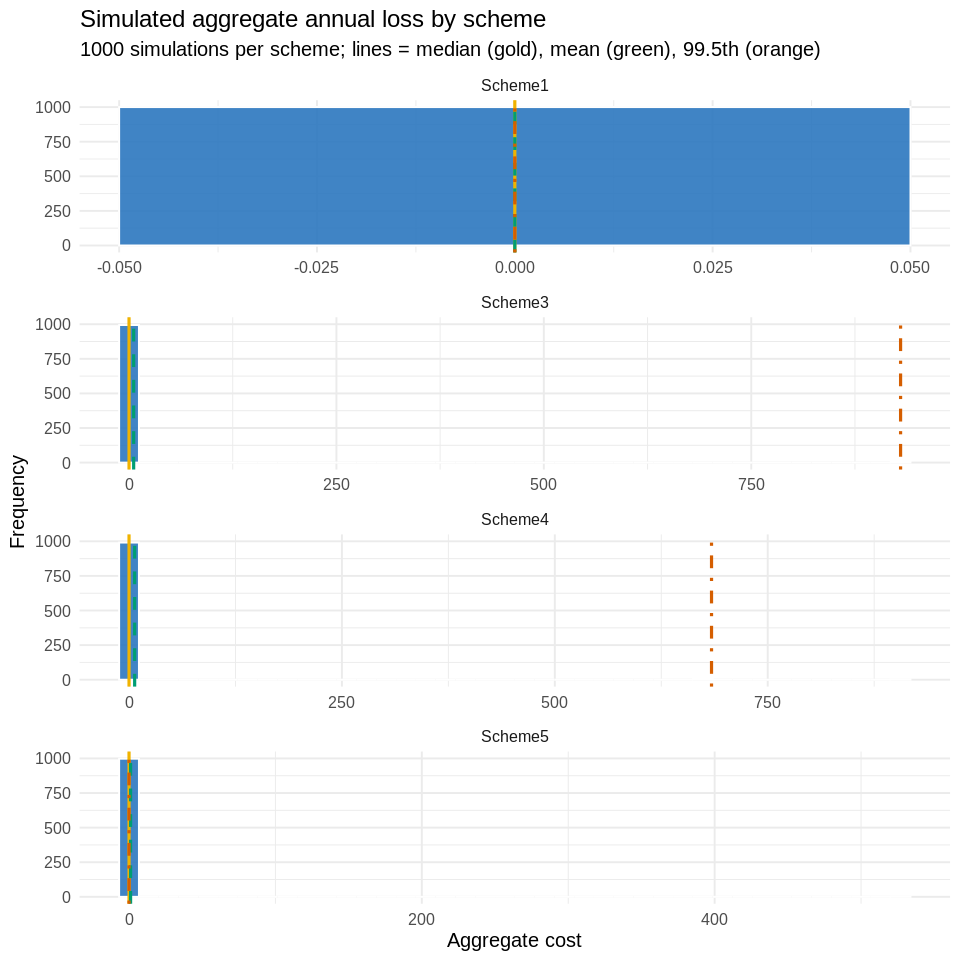

In [145]:
ggplot(sim_res, aes(x = cost)) +
  geom_histogram(bins = 40, fill = "#2C77BF", color = "white", alpha = 0.9) +
  facet_wrap(~ scheme, ncol = 1, scales = "free_x") +
  geom_vline(data = sim_stats, aes(xintercept = median), color = "#F0B300", linetype = "solid",  linewidth = 0.9) +
  geom_vline(data = sim_stats, aes(xintercept = mean),   color = "#009E73", linetype = "dashed", linewidth = 0.9) +
  geom_vline(data = sim_stats, aes(xintercept = p995),   color = "#D55E00", linetype = "dotdash",linewidth = 0.9) +
  scale_x_continuous(labels = label_number(scale_cut = cut_short_scale())) +
  labs(title = "Simulated aggregate annual loss by scheme",
       subtitle = glue("{nsim} simulations per scheme; lines = median (gold), mean (green), 99.5th (orange)"),
       x = "Aggregate cost", y = "Frequency") +
  theme_minimal(base_size = 12)

'''Error in `mutate()`:
ℹ In argument: `outcome = as.factor(as.integer(outcome)) %>%
  fct_relevel("1")`.
Caused by error:
! [conflicted] as.factor found in 3 packages.
Either pick the one you want with `::`:
• GenomicRanges::as.factor
• generics::as.factor
• base::as.factor
Or declare a preference with `conflicted::conflicts_prefer()`:
• `conflicted::conflicts_prefer(GenomicRanges::as.factor)`
• `conflicted::conflicts_prefer(generics::as.factor)`
• `conflicted::conflicts_prefer(base::as.factor)`

-----

Error:
! [conflicted] intersect found in 3 packages.
Either pick the one you want with `::`:
• lubridate::intersect
• GenomicRanges::intersect
• base::intersect
Or declare a preference with `conflicted::conflicts_prefer()`:
• `conflicted::conflicts_prefer(lubridate::intersect)`
• `conflicted::conflicts_prefer(GenomicRanges::intersect)`
• `conflicted::conflicts_prefer(base::intersect)`
Traceback:
'''

# Problem 2

In [146]:
dta     <- read_csv("p02re_data.csv",     show_col_types = FALSE) %>% clean_names()
scoring <- read_csv("p02re_scoring.csv",  show_col_types = FALSE) %>% clean_names() %>%
  mutate(generated_id = row_number()) # Add generated_id to scoring data

dta <- dta %>% mutate(outcome = base::as.factor(as.integer(outcome)) %>% fct_relevel("1"))
id_cols <- base::intersect(names(dta), c("id","row_id"))

# If id_cols is empty, create a new 'generated_id' column
if (length(id_cols) == 0) {
  dta <- dta %>% mutate(generated_id = row_number())
  id_cols <- "generated_id"
  message("No existing 'id' or 'row_id' found. Created 'generated_id' column.")
}

No existing 'id' or 'row_id' found. Created 'generated_id' column.



In [147]:
names(dta)

[1] "outcome"      "group"        "q"            "r"            "s"           
 [6] "t"            "u"            "v"            "w"            "x"           
[11] "z"            "generated_id"

In [148]:
head(dta)

outcome,group,q,r,s,t,u,v,w,x,z,generated_id
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,b,2.6995766,NA,1.68851239,-0.01786164,1.0921547,0.9375371,0.2964448,0.61961927,0.08389748,1
1,b,0.6471843,NA,-0.95136257,-0.22263619,-0.3838037,0.3282534,0.1596110,-0.30651149,0.11796766,2
0,d,1.6022289,NA,-0.21877136,0.47999658,-0.6301556,-0.2415956,-0.4354890,-0.04159803,-0.37347547,3
0,a,2.8971964,NA,0.22433038,0.09416841,-0.1625731,0.9750934,0.8255505,0.83353697,-0.74098194,4
0,f,0.5719260,NA,0.01527246,-1.22758179,0.3215543,-0.6677111,-0.0806658,-0.36671739,0.08764687,5
0,g,0.8601487,NA,-0.91553175,-1.05359932,1.6016041,0.1442858,-0.9333913,-0.46052836,0.23940148,6


In [149]:
names(dta)

[1] "outcome"      "group"        "q"            "r"            "s"           
 [6] "t"            "u"            "v"            "w"            "x"           
[11] "z"            "generated_id"

In [150]:

# You can check the new column and id_cols content
head(dta)
print(id_cols)

outcome,group,q,r,s,t,u,v,w,x,z,generated_id
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,b,2.6995766,NA,1.68851239,-0.01786164,1.0921547,0.9375371,0.2964448,0.61961927,0.08389748,1
1,b,0.6471843,NA,-0.95136257,-0.22263619,-0.3838037,0.3282534,0.1596110,-0.30651149,0.11796766,2
0,d,1.6022289,NA,-0.21877136,0.47999658,-0.6301556,-0.2415956,-0.4354890,-0.04159803,-0.37347547,3
0,a,2.8971964,NA,0.22433038,0.09416841,-0.1625731,0.9750934,0.8255505,0.83353697,-0.74098194,4
0,f,0.5719260,NA,0.01527246,-1.22758179,0.3215543,-0.6677111,-0.0806658,-0.36671739,0.08764687,5
0,g,0.8601487,NA,-0.91553175,-1.05359932,1.6016041,0.1442858,-0.9333913,-0.46052836,0.23940148,6


[1] "generated_id"


After running the above cell, please re-run the `rec` recipe cell (cell `RET4fjehNaNZ`) to ensure the `update_role()` function now recognizes the `generated_id` column.

Let's break down what's happening in these two lines of R code:

dta <- dta %>% mutate(outcome = base::as.factor(as.integer(outcome)) %>% fct_relevel("1"))

dta %>% mutate(...): This part uses the dplyr package's pipe (%>%) operator to take your dta dataframe and modify it. The mutate() function is used to create or change columns.
outcome = ...: This specifies that the outcome column is being modified.
as.integer(outcome): First, the existing outcome column is converted into an integer type.
base::as.factor(...): This takes the integer version of outcome and converts it into a factor. base:: explicitly tells R to use the as.factor function from the base R package, preventing conflicts if other packages also define an as.factor function.
fct_relevel("1"): This function from the forcats package (part of tidyverse) reorders the levels of the newly created factor so that '1' becomes the first level. This is common when '1' represents a 'positive' or 'event' outcome.
In summary: This line ensures your outcome column is a factor, with '1' as its reference level, which is often crucial for modeling.

id_cols <- base::intersect(names(dta), c("id","row_id"))

names(dta): This gets a list (a character vector) of all column names in your dta dataframe.
c("id","row_id"): This creates a character vector containing the strings "id" and "row_id".
base::intersect(...): This function, again explicitly from the base R package, finds the common elements between the list of your dataframe's column names and the vector c("id","row_id"). It will return a character vector containing any column names that are present in both.
id_cols <- ...: The result of this intersection (any column names that are either 'id' or 'row_id' and exist in dta) is stored in a variable called id_cols.
In summary: This line identifies if your dta dataframe contains columns named 'id' or 'row_id' and stores those names in id_cols. This id_cols variable is often used later to tell functions (like update_role() in recipes) to treat these columns as identifiers rather than features for modeling.

In [151]:
head(id_cols)

[1] "generated_id"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RANN’, ‘ROSE’

Error in step_smote(., outcome): could not find function "step_smote"
Traceback:

In [177]:
dta <- dta %>%
  mutate(generated_id = row_number()) # Create a new unique ID column
id_cols <- "generated_id" # Update id_cols to point to the new column

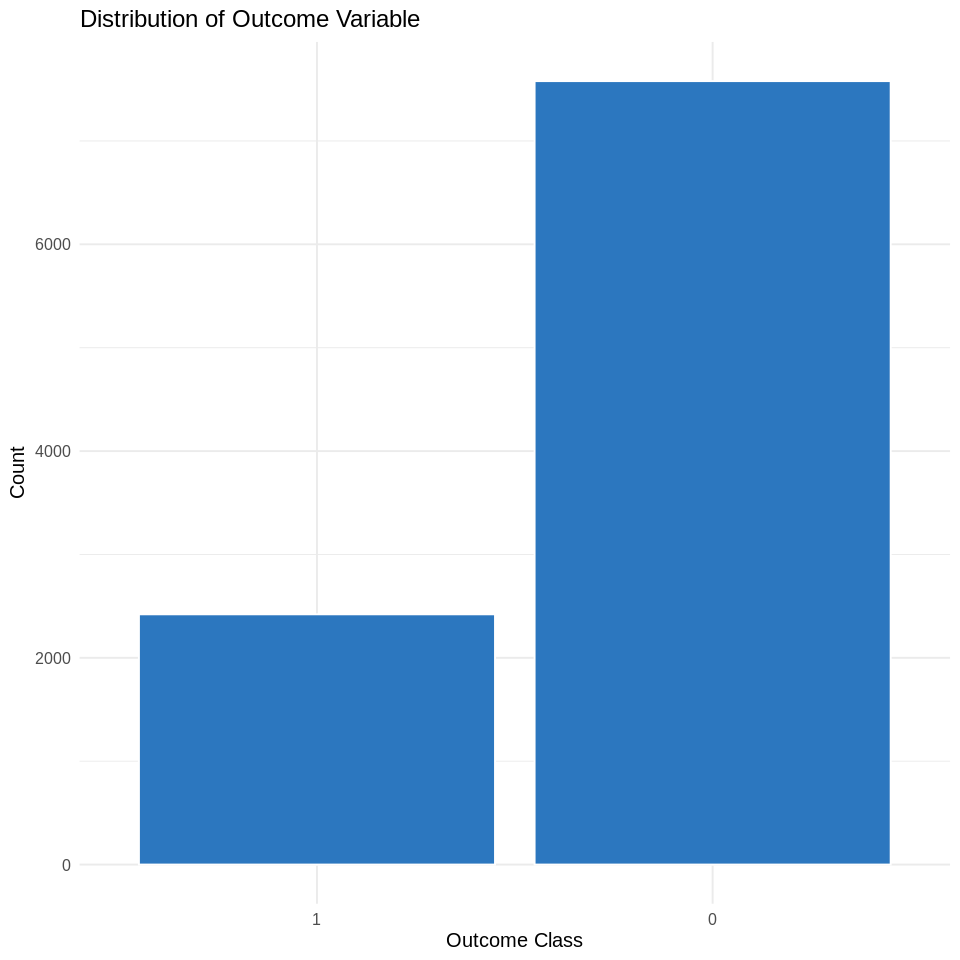

In [176]:
ggplot(dta, aes(x = outcome)) +
  geom_bar(fill = "#2C77BF", color = "white") +
  labs(title = "Distribution of Outcome Variable",
       x = "Outcome Class",
       y = "Count") +
  theme_minimal(base_size = 12)

In [ ]:
install.packages("themis")
library(themis) # Load the themis package

In [179]:


rec <- recipe(outcome ~ ., data = dta) %>%
  update_role(all_of(id_cols), new_role = "ID") %>%
  step_string2factor(all_nominal_predictors()) %>%
  step_novel(all_nominal_predictors()) %>%
  step_other(all_nominal_predictors(), threshold = 0.01, other = "other") %>%
  step_impute_median(all_numeric_predictors()) %>%
  step_impute_mode(all_nominal_predictors()) %>%
  step_dummy(all_nominal_predictors(), one_hot = TRUE) %>%
  step_smote(outcome) %>% # Moved after step_dummy
  step_zv(all_predictors())

In [180]:
# Columns after preprocessing (for mtry upper bound)
prep_rec <- prep(rec)
X_cols   <- ncol(juice(prep_rec)) - 1L

In [181]:
X_cols

[1] 16

In [182]:
glmnet_spec <- logistic_reg(penalty = tune(), mixture = tune()) %>%
  set_engine("glmnet")

In [183]:
xgb_spec <- boost_tree(
  trees = 1000, tree_depth = tune(), learn_rate = tune(),
  mtry  = tune(), min_n = tune(), loss_reduction = tune()
) %>% set_engine("xgboost") %>% set_mode("classification")

In [184]:
rf_spec <- rand_forest(
  trees = 1000, mtry = tune(), min_n = tune()
) %>% set_engine("ranger", importance = "permutation") %>%
  set_mode("classification")

In [185]:
glmnet_wf <- workflow() %>% add_model(glmnet_spec) %>% add_recipe(rec)
xgb_wf    <- workflow() %>% add_model(xgb_spec)    %>% add_recipe(rec)
rf_wf     <- workflow() %>% add_model(rf_spec)     %>% add_recipe(rec)

Warning message:
“`grid_latin_hypercube()` was deprecated in dials 1.3.0.
ℹ Please use `grid_space_filling()` instead.”

In [186]:
glmnet_grid <- grid_regular(penalty(range = c(-4, 0)), mixture(), levels = 5)
xgb_grid    <- grid_space_filling(tree_depth(), learn_rate(),
                 mtry(range = c(1L, min(50L, X_cols))), min_n(), loss_reduction(), size = 20)
rf_grid     <- grid_space_filling(mtry(range = c(1L, min(50L, X_cols))), min_n(), size = 15)

In [ ]:
Error: object 'folds' not found

Error in `tune_grid()`:
! The `metrics` argument should be the results of
  `yardstick::metric_set()`.

Error:
! [conflicted] accuracy found in 2 packages.
Either pick the one you want with `::`:
• yardstick::accuracy
• generics::accuracy
Or declare a preference with `conflicted::conflicts_prefer()`:
• `conflicted::conflicts_prefer(yardstick::accuracy)`
• `conflicted::conflicts_prefer(generics::accuracy)`
Traceback:

In [187]:
metrics <- metric_set(yardstick::accuracy, roc_auc)

In [188]:
set.seed(123)
folds <- vfold_cv(dta, v = 5, strata = outcome)

 glmnet package is not installed. This package is required for the logistic regression model you're trying to tune. You need to install it before running the tune_grid function for glmnet_wf. I'll add a cell to install it for you.



Error in `tune_grid()`:
! Package install is required for xgboost.
Traceback:

In [102]:
install.packages("glmnet")
install.packages("xgboost")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



The installation of the above two libraries takes a lot of time close to 10-15 mins in my collab set up so chill

The below code takes 18-20 mins to run

In [189]:
set.seed(1234)
xgb_res    <- tune_grid(xgb_wf,    resamples = folds, grid = xgb_grid,    metrics = metrics)

Error in `tune_grid()`:
! Package install is required for ranger.
Traceback:

In [190]:
install.packages("ranger")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("ranger"):
“installation of package ‘ranger’ had non-zero exit status”


. This often results in NA values for metrics for those problematic runs, but doesn't halt the entire tuning process.

In [ ]:
set.seed(1234)
rf_res     <- tune_grid(rf_wf,     resamples = folds, grid = rf_grid,     metrics = metrics)

→ A | warning: ! 16 columns were requested but there were 15 predictors in the data.
               ℹ 15 predictors will be used.

There were issues with some computations   A: x1

→ B | error:   User interrupt or internal error.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1

There were issues with some computations   A: x1   B: x3

There were issues with some computations   A: x2   B: x5

There were issues with some computations   A: x3   B: x5

There were issues with some computations   A: x4   B: x5

There were issues with some computations   A: x4   B: x6

There were issues with some computations   A: x4   B: x8

There were issues with some computations   A: x4   B: x11



In [108]:
set.seed(1234)
glmnet_res <- tune_grid(glmnet_wf, resamples = folds, grid = glmnet_grid, metrics = metrics)

In [163]:
leaderboard <- bind_rows(
  collect_metrics(glmnet_res) %>% filter(.metric == "roc_auc") %>% mutate(model="glmnet"),
  collect_metrics(xgb_res)    %>% filter(.metric == "roc_auc") %>% mutate(model="xgboost"),
  collect_metrics(rf_res)     %>% filter(.metric == "roc_auc") %>% mutate(model="ranger")
) %>% arrange(desc(mean))

leaderboard

penalty,mixture,.metric,.estimator,mean,n,std_err,.config,model,mtry,min_n,tree_depth,learn_rate,loss_reduction
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
NA,NA,roc_auc,binary,0.7749080,5,0.004238062,pre0_mod17_post0,xgboost,13,28,10,1.274275e-03,1.947483e+00
NA,NA,roc_auc,binary,0.7746318,5,0.002454424,pre0_mod10_post0,xgboost,6,38,5,1.832981e-06,1.000000e-10
NA,NA,roc_auc,binary,0.7744380,5,0.003447902,pre0_mod02_post0,xgboost,1,26,4,1.128838e-02,4.281332e-07
NA,NA,roc_auc,binary,0.7736156,5,0.002064674,pre0_mod08_post0,xgboost,4,36,15,1.438450e-04,6.951928e-06
NA,NA,roc_auc,binary,0.7735273,5,0.003736220,pre0_mod11_post0,xgboost,7,14,2,3.359818e-02,4.832930e-01
NA,NA,roc_auc,binary,0.7733409,5,0.002370350,pre0_mod07_post0,xgboost,4,6,11,6.158482e-07,4.029611e-10
NA,NA,roc_auc,binary,0.7721304,5,0.003410544,pre0_mod05_post0,xgboost,3,8,13,3.792690e-03,7.386200e-03
NA,NA,roc_auc,binary,0.7707199,5,0.003466289,pre0_mod12_post0,xgboost,8,12,14,2.636651e-09,1.199354e-01
NA,NA,roc_auc,binary,0.7697479,5,0.002016618,pre0_mod02_post0,ranger,2,10,NA,NA,NA


Error in `select_best()`:
! `...` must be empty.
✖ Problematic argument:
• ..1 = "roc_auc"
ℹ Did you forget to name an argument?
Traceback:

1. check_final_param(parameters)
2. select_best(xgb_res, "roc_auc")
3. select_best.tune_results(xgb_res, "roc_auc")
4. rlang::check_dots_empty()
5. action_dots(error = error, action = action, message = "`...` must be empty.",
 .     note = note, dots_i = TRUE, class = "rlib_error_dots_nonempty",
 .     call = call, env = env)
6. try_dots(action(c(message, x = bullet_header, set_names(bullets,
 .     "*"), note), class = c(class, "rlib_error_dots"), ...))
7. action(c(message, x = bullet_header, set_names(bullets, "*"),
 .     note), class = c(class, "rlib_error_dots"), ...)
8. signal_abort(cnd, .file)
9. signalCondition(cnd)

Error in `hardhat::forge()`:
! The required column "generated_id" is missing.
Traceback:

In [165]:
# 1. Define the normal logistic regression model specification
logistic_spec <- logistic_reg() %>%
  set_engine("glm") %>% # Use the 'glm' engine for standard logistic regression
  set_mode("classification")

In [166]:
# 2. Create a workflow for the normal logistic regression
logistic_wf <- workflow() %>%
  add_model(logistic_spec) %>%
  add_recipe(rec)

In [167]:
# 3. Fit the normal logistic regression model (no tuning needed for basic glm)
set.seed(1234)
logistic_fit_res <- fit_resamples(logistic_wf, resamples = folds, metrics = metrics)

# 4. Add the results to the leaderboard
leaderboard <- bind_rows(
  leaderboard,
  collect_metrics(logistic_fit_res) %>% filter(.metric == "roc_auc") %>% mutate(model="logistic_glm")
) %>% arrange(desc(mean))

leaderboard

penalty,mixture,.metric,.estimator,mean,n,std_err,.config,model,mtry,min_n,tree_depth,learn_rate,loss_reduction
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
NA,NA,roc_auc,binary,0.7749080,5,0.004238062,pre0_mod17_post0,xgboost,13,28,10,1.274275e-03,1.947483e+00
NA,NA,roc_auc,binary,0.7746318,5,0.002454424,pre0_mod10_post0,xgboost,6,38,5,1.832981e-06,1.000000e-10
NA,NA,roc_auc,binary,0.7744380,5,0.003447902,pre0_mod02_post0,xgboost,1,26,4,1.128838e-02,4.281332e-07
NA,NA,roc_auc,binary,0.7736156,5,0.002064674,pre0_mod08_post0,xgboost,4,36,15,1.438450e-04,6.951928e-06
NA,NA,roc_auc,binary,0.7735273,5,0.003736220,pre0_mod11_post0,xgboost,7,14,2,3.359818e-02,4.832930e-01
NA,NA,roc_auc,binary,0.7733409,5,0.002370350,pre0_mod07_post0,xgboost,4,6,11,6.158482e-07,4.029611e-10
NA,NA,roc_auc,binary,0.7721304,5,0.003410544,pre0_mod05_post0,xgboost,3,8,13,3.792690e-03,7.386200e-03
NA,NA,roc_auc,binary,0.7707199,5,0.003466289,pre0_mod12_post0,xgboost,8,12,14,2.636651e-09,1.199354e-01
NA,NA,roc_auc,binary,0.7697479,5,0.002016618,pre0_mod02_post0,ranger,2,10,NA,NA,NA


In [171]:
winner <- leaderboard %>% slice(1) %>% pull(model)

final_wf <- switch(winner,
  "glmnet"  = finalize_workflow(glmnet_wf, select_best(glmnet_res, metric = "roc_auc")),
  "xgboost" = finalize_workflow(xgb_wf,    select_best(xgb_res,    metric = "roc_auc")),
  "ranger"  = finalize_workflow(rf_wf,     select_best(rf_res,     metric = "roc_auc")),
  "logistic_glm" = logistic_wf # No tuning for basic glm, use the workflow directly
)

final_fit <- final_wf %>% fit(dta)

expected_auc <- leaderboard %>% slice(1) %>% select(model, mean, std_err)
expected_auc

pred_scoring <- predict(final_fit, scoring, type = "prob") %>% rename(prob_1 = .pred_1)
head(pred_scoring)

model,mean,std_err
<chr>,<dbl>,<dbl>
xgboost,0.774908,0.004238062


prob_1,.pred_0
<dbl>,<dbl>
0.3424623,0.6575377
0.2242300,0.7757700
0.4497788,0.5502212
0.1867424,0.8132576
0.4969476,0.5030524
0.2193380,0.7806620


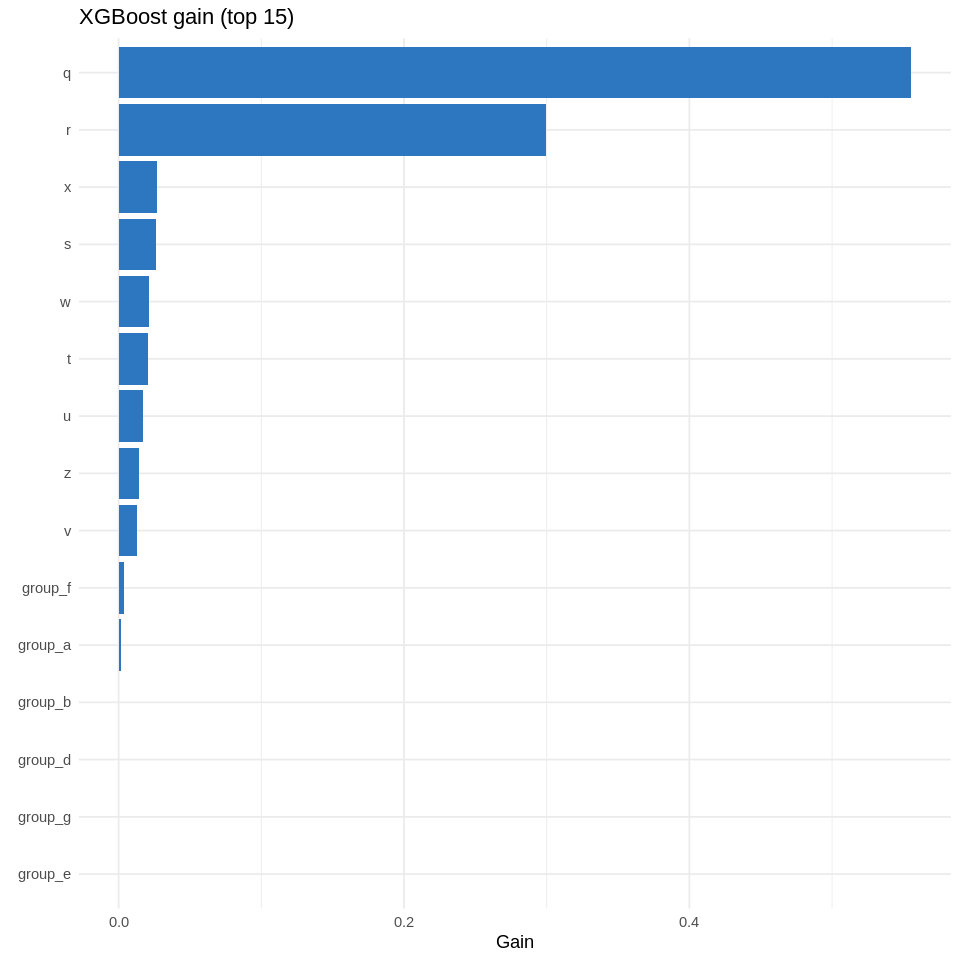

In [172]:
if (winner == "ranger") {
  fitted <- extract_fit_parsnip(final_fit)$fit
  imp <- enframe(fitted$variable.importance, name = "feature", value = "importance") %>%
    arrange(desc(importance)) %>% slice_head(n=15)
  ggplot(imp, aes(reorder(feature, importance), importance)) +
    geom_col(fill="#2C77BF") + coord_flip() +
    labs(title="Permutation importance (top 15)", x=NULL, y="Importance") +
    theme_minimal(11)
} else if (winner == "xgboost") {
  fitted <- extract_fit_parsnip(final_fit)$fit
  imp <- xgboost::xgb.importance(model = fitted) %>% as_tibble() %>% slice_head(n=15)
  ggplot(imp, aes(reorder(Feature, Gain), Gain)) +
    geom_col(fill="#2C77BF") + coord_flip() +
    labs(title="XGBoost gain (top 15)", x=NULL, y="Gain") +
    theme_minimal(11)
} else {
  fitted <- extract_fit_parsnip(final_fit)$fit
  beta <- as.matrix(coef(fitted, s = fitted$lambdaOpt)) %>%
    as.data.frame() %>% rownames_to_column("feature") %>% rename(coef = `1`) %>%
    arrange(desc(abs(coef))) %>% slice_head(n=20)
  beta
}